# Risk Simulation Manuscript Figures
AFink 2023

In [1]:
import numpy as np
import random
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import minimize # minimize function is used for parameter recovery 
import seaborn as sns 
from scipy.stats import pearsonr
import statsmodels.api as sm
import pickle

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/alexandrafink/Documents/GraduateSchool/SaezLab/gambling_stim_cfc/scripts/risk_sim/')
import risk_sim_utils

In [3]:
data_path = '/Users/alexandrafink/Documents/GraduateSchool/SaezLab/gambling_stim_cfc/data/risk_simulations/'
risk_dict = pd.read_pickle(rf'{data_path}/risk_dict.pkl')
risk_attitudes = pd.read_pickle(rf'{data_path}/risk_attitudes.pkl')
risk_profits = pd.read_pickle(rf'{data_path}/risk_profits.pkl')
risk_indiff_pts = pd.read_pickle(rf'{data_path}/risk_indiff_pts.pkl')

In [4]:
len(risk_attitudes)

48

In [7]:
####set theme for all plots
sns.set_theme(style='ticks',font='Arial') 
sns.set_context("poster")

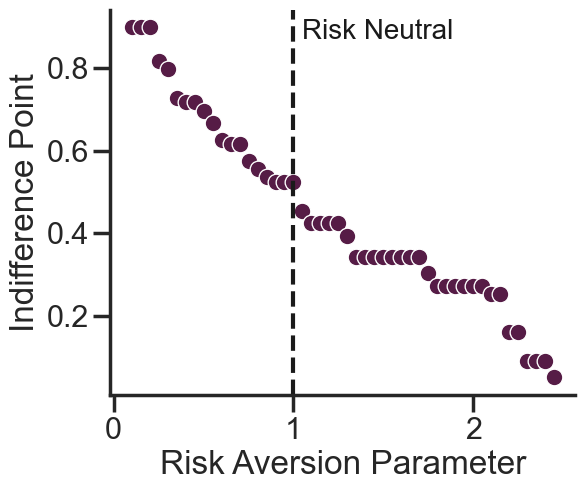

In [21]:
fig,ax = plt.subplots(figsize=(6,5))
sns.scatterplot(x=risk_attitudes,y=risk_indiff_pts,color="#561C46")
ax.set_xlabel('Risk Aversion Parameter')
ax.set_ylabel('Indifference Point',x=0.025)
plt.axvline(x=1, color='k',linestyle="--")
ax.text(1.05, 0.87, "Risk Neutral",fontsize=20,color = 'k') ##CDB6B6
sns.despine()

plt.savefig('/Users/alexandrafink/Documents/GraduateSchool/SaezLab/gambling_stim_cfc/figs/risk_simulation/SOM_risk_IP_scatter_v2.pdf', dpi=500, format='pdf', metadata=None,
bbox_inches='tight', pad_inches=0.2,
facecolor='auto', edgecolor='auto',
backend=None) 

In [8]:
r, p = pearsonr(x=risk_attitudes, y=risk_indiff_pts)
print(r)
print(p)

-0.979059295004489
1.8982530799701927e-33


In [10]:
optimal_risk_av = risk_attitudes[int(np.where(risk_profits == np.max(risk_profits))[0])]
optimal_risk_av

/var/folders/xk/q5rxx0ld0hnc9gjlq1dhwqhw0000gn/T/ipykernel_56818/2545682559.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  optimal_risk_av = risk_attitudes[int(np.where(risk_profits == np.max(risk_profits))[0])]


1.05

In [5]:
np.max(risk_profits)

2748.16

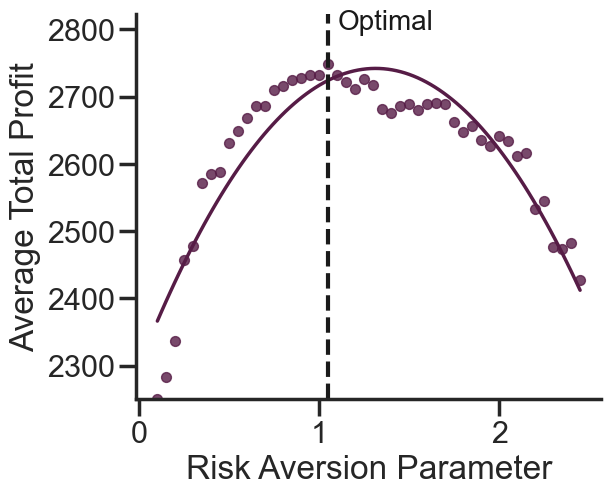

In [22]:
fig,ax = plt.subplots(figsize=(6,5))

sns.regplot(x=risk_attitudes,y=risk_profits,scatter=True,order=2,ci=None,color="#561C46",scatter_kws={'s':50},line_kws={'linewidth':2.5})
plt.ylabel('Average Total Profit')
plt.xlabel('Risk Aversion Parameter')
ax.set_ylim([np.min(risk_profits),np.max(risk_profits)+75])
plt.axvline(x=optimal_risk_av, color='k',linestyle="--")
ax.text(optimal_risk_av+0.05, 2800, "Optimal",fontsize=20,color = 'k')
sns.despine()

plt.savefig('/Users/alexandrafink/Documents/GraduateSchool/SaezLab/gambling_stim_cfc/figs/risk_simulation/SOM_risk_profit_curve_v2.pdf', dpi=500, format='pdf', metadata=None,
bbox_inches='tight', pad_inches=0.2,
facecolor='auto', edgecolor='auto',
backend=None) 

In [13]:
optimal_ip = risk_indiff_pts[int(np.where(risk_profits == np.max(risk_profits))[0])]
optimal_ip

/var/folders/xk/q5rxx0ld0hnc9gjlq1dhwqhw0000gn/T/ipykernel_56818/3023500153.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  optimal_ip = risk_indiff_pts[int(np.where(risk_profits == np.max(risk_profits))[0])]


0.4545454545454546

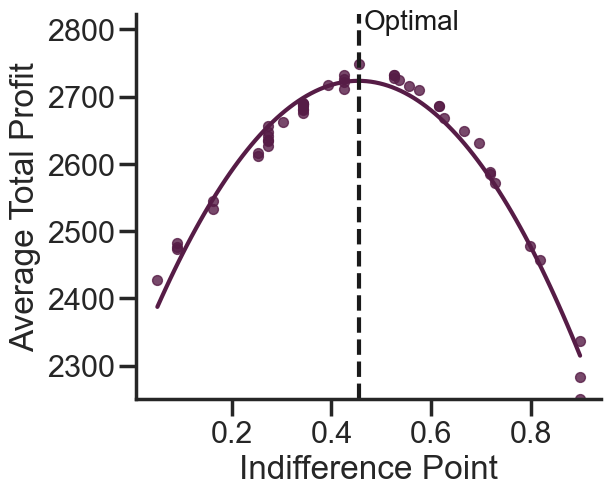

In [23]:
fig,ax = plt.subplots(figsize=(6,5))
sns.regplot(x=risk_indiff_pts,y=risk_profits,scatter=True,order=2,ci=None,color="#561C46",scatter_kws={'s':50},line_kws={'linewidth':3})
plt.xlabel('Indifference Point')
plt.ylabel('Average Total Profit')
plt.axvline(x=optimal_ip, color='k',linestyle="--")
ax.text(optimal_ip+0.01, 2800, "Optimal",fontsize=20,color = 'k')
ax.set_ylim([np.min(risk_profits),np.max(risk_profits)+75])
sns.despine()

plt.savefig('/Users/alexandrafink/Documents/GraduateSchool/SaezLab/gambling_stim_cfc/figs/risk_simulation/IP_profit_curve_v2.pdf', dpi=500, format='pdf', metadata=None,
bbox_inches='tight', pad_inches=0.2,
facecolor='auto', edgecolor='auto',
backend=None) 